## **Objective:**
The goal of this assignment is to help you practice key data science skills: loading and cleaning data, fitting both logistic regression and K-Nearest Neighbors (KNN) regressor models, and evaluating model performance using a confusion matrix. You will also analyze and describe the differences between false positives (FP) and false negatives (FN) in the context of your chosen dataset and decide which model performs better.

- **Chosen Dataset:** The dataset "Lung Cancer Survey" contains both categorical and numeric variables. The target variable LUNG_CANCER is categorical, with values indicating "YES" or "NO" (whether a person has lung cancer).
- **Features:** This dataset includes variables like
    - GENDER
    - AGE
    - SMOKING
    - YELLOW_FINGERS
    - ANXIETY
    - PEER_PRESURE
    - CHRONIC DISEASE
    - FATIGUE
    - ALLERGY
    - WHEEZING 
    - ALCOHOL CONSUMING
    - COUGHING
    - SHORTNESS OF BREATH
    - SWALLOWING DIFFICULTY
    - CHEST PAIN
    - LUNG_CANCER
    
This dataset meets the requirements because it has:
- A categorical target variable (LUNG_CANCER).
- A mix of categorical (GENDER) and numeric variables (e.g., AGE, SMOKING, etc.).

### Import the libraries needed for the below code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Data Loading and Cleaning:
**Objective:** Load the dataset using pandas Dataframe, handling missing data, encoding categorical columns and standardize the data.

### 2.1. Data Loading:

Loading the data using pd.read_csv() and printing the first few elements using head().


In [2]:
# Load the dataset
url = "C:/Users/Abhijith Nallana/Downloads/lung cancer survey.csv"
lung_cancer_df = pd.read_csv(url)

# Display the first few rows
print(lung_cancer_df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

### 2.2: Handling Missing values

Checking for missing values in the dataset to ensure data integrity.

In [3]:
# Checking for missing values to ensure data integrity
print("\nChecking for Missing Values:")
print(lung_cancer_df.isnull().sum())


Checking for Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


**Note:** Since no missing data is presented, no data imputation or deletion of rows or columns required

### 2.3 Column Replacing:

Spaces in column names are replaced with underscores for easier access of the data from dataset.

In [4]:
# Replace spaces in column names with underscores for easier access
lung_cancer_df.columns = lung_cancer_df.columns.str.replace(' ', '_')
lung_cancer_df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE_', 'ALLERGY_', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

### 2.4. Encoding Categorical Variables:

Importing **LabelEncoder** for encoding categorical variables from **sklearn.preprocessing**

In [5]:
from sklearn.preprocessing import LabelEncoder

- The LUNG_CANCER column (target) is encoded as binary using LabelEncoder, where **0** represents **"NO"** and **1** represents **"YES"**.
- The GENDER column is similarly encoded, where **0** represents **"F"** (Female) and **1** represents **"M"** (Male).

In [6]:
# Identify categorical columns and numeric columns
categorical_cols = ['GENDER', 'LUNG_CANCER']
numeric_cols = lung_cancer_df.columns.difference(categorical_cols)

# Encode the categorical columns
label_encoder = LabelEncoder()
# Target variable (0: NO, 1: YES)
lung_cancer_df['LUNG_CANCER'] = label_encoder.fit_transform(lung_cancer_df['LUNG_CANCER'])
# Gender (0: F, 1: M)
lung_cancer_df['GENDER'] = label_encoder.fit_transform(lung_cancer_df['GENDER'])

lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE_,ALLERGY_,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### 2.5. Scaling Numeric Features:

Importing **StandardScaler** for encoding categorical variables from **sklearn.preprocessing**


In [7]:
from sklearn.preprocessing import StandardScaler

The numeric features are scaled using **StandardScaler** to standardize the data **(mean of 0 and variance of 1)**.

In [8]:
# Scaling Numeric Features
scaler = StandardScaler()
lung_cancer_df[numeric_cols] = scaler.fit_transform(lung_cancer_df[numeric_cols])
lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE_,ALLERGY_,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,1
1,1,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,1
2,0,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,0
3,1,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,0
4,0,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,0


This preprocessing step ensures the dataset is ready for model training.

## 3.Logistic Regression Model:

Importing **train_test_split** from sklearn.model_selection to split the data for training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

**Objective:**
- Fit a logistic regression model on your data.
- Make predictions on the test set.
- Evaluate the model using a confusion matrix and calculate accuracy, precision, recall, and F1 score.

**Target (y):**
The LUNG_CANCER column is the target variable. It represents the presence (YES) or absence (NO) of lung cancer. After encoding, it becomes a binary variable where:
0 = No lung cancer
1 = Lung cancer

**Features (X):**
The features are the rest of the columns in the dataset (everything except LUNG_CANCER). This includes all the variables that might influence whether a person has lung cancer or not, such as:
- GENDER
- AGE
- SMOKING
- YELLOW_FINGERS
- ANXIETY and others.

These features will be used to predict the target (LUNG_CANCER). In other words, the model will learn how these features correlate with the presence of lung cancer.

In [10]:
# Train-Test Split
X = lung_cancer_df.drop(columns=['LUNG_CANCER'])  # Features
y = lung_cancer_df['LUNG_CANCER']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1 Model Training:

A logistic regression model is fitted using **LogisticRegression** from **sklearn.linear_model**.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 3.2 Model Prediction:

The model predicts the testing data using predict()

In [13]:
# Predictions
y_pred_logistic = logistic_model.predict(X_test)

### 3.3. Logistic Regression Evaluation:

Importing evaluation methods like **confusion_matrix, accuracy_score, precision_score, recall_score, f1_score** from **sklearn.metrics**

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

- **Confusion Matrix:** The confusion matrix is generated to compare actual and predicted values.

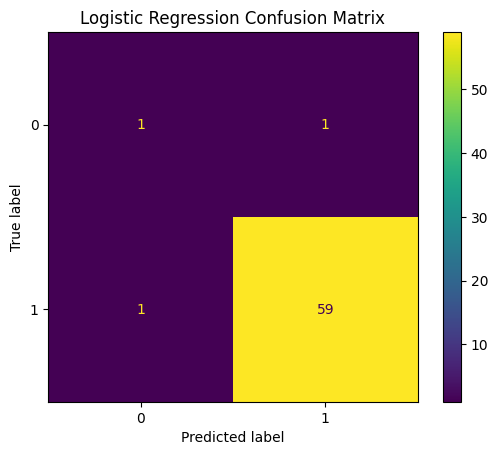

In [15]:
# 5. Evaluation Metrics for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_log = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic)
disp_log.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

- **Evaluation Metrics:** Key performance metrics like accuracy, precision, recall, and F1 score are calculated.

In [16]:
# Logistic regression evaluation methods
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print results for Logistic Regression
print("Logistic Regression Results:")
print("Confusion Matrix:\n", conf_matrix_logistic)
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Results:
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1 Score: 0.9833333333333333


## 4. K-Nearest Neighbors (KNN) Classifier Model:

A K-Nearest Neighbors classifier model is fitted using **KNeighborsClassifier** from **sklearn.neighbors**.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

### 4.1 Model Training:

KNN classifier is fitted using **KNeighborsClassifier** from **sklearn**. The number of neighbors (n_neighbors) is set to 5.

In [18]:
# 6. KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### 4.2 Model Predictions:

The KNN model makes predictions on the test set.

In [19]:
# Predictions
y_pred_knn = knn_model.predict(X_test)

### 4.3 KNN Model Evaluation:

**Objective:** Evaluate the KNN model using a confusion matrix and other metrics.

- **Confusion Matrix:** The confusion matrix for the KNN model is generated.

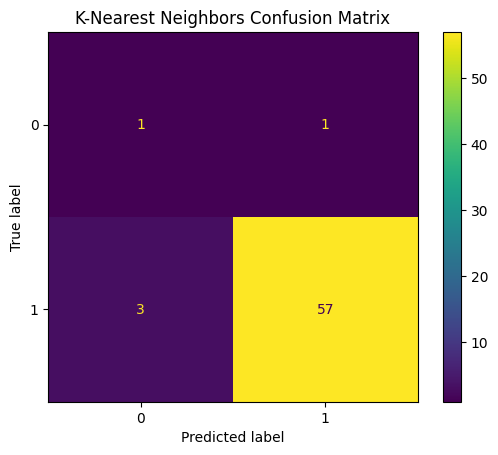

In [20]:
# Evaluation Metrics for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp_knn.plot()
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

- **Evaluation Metrics:** The performance metrics (accuracy, precision, recall, F1 score) are calculated for the KNN model.

In [21]:
# Model Evaluation:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print results for KNN
print("\nKNN Results:")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)


KNN Results:
Confusion Matrix:
 [[ 1  1]
 [ 3 57]]
Accuracy: 0.9354838709677419
Precision: 0.9827586206896551
Recall: 0.95
F1 Score: 0.9661016949152542


## 5.Confusion Matrix Evaluation

**Objective:** Compare the confusion matrices from both models and interpret false positives (FP) and false negatives (FN).

- **False Positives (FP):** The model predicts a person has lung cancer when they don't.
    In the context of medical diagnostics, this could cause unnecessary stress or further medical tests.
- **False Negatives (FN):** The model predicts a person does not have lung cancer when they do. In the context of lung cancer, this is more serious because it could delay treatment and lead to adverse health outcomes.


In this dataset, false negatives are likely to be more problematic because missing a cancer diagnosis is a critical mistake.

## 6. Model Comparison:

**Objective:** Compare the logistic regression and KNN models and determine which one performs better.

**1. Confusion Matrix Analysis:**

**1.1. Logistic Regression:**
- True Positives (TP): 59
- True Negatives (TN): 1
- False Positives (FP): 1
- False Negatives (FN): 1
  
**1.2. KNN:**
- True Positives (TP): 57
- True Negatives (TN): 1
- False Positives (FP): 1
- False Negatives (FN): 3

From the confusion matrices, we see that both models performed well in identifying true positives, but KNN had more false negatives compared to logistic regression.

**2. Performance Metrics:**

- **Accuracy:** Logistic regression has a higher accuracy (96.8%) compared to KNN (93.5%).
- **Precision:** Both models exhibit high precision (above 98%), indicating that when they predict a positive outcome, they are generally correct.
- **Recall:** Logistic regression (98.3%) has a higher recall compared to KNN (95.0%). This means logistic regression is better at identifying actual positive cases.
- **F1 Score:** The F1 score is higher for logistic regression (98.3%) than for KNN (96.6%). The F1 score considers both precision and recall, indicating that logistic regression has a better balance between the two.
  
**2.1. False Positives and False Negatives:**

- In this context, False Positives (FP) represent instances where the model incorrectly predicts lung cancer when it is not present.
False Negatives (FN) are cases where the model fails to identify lung cancer when it is present. Given that lung cancer diagnosis can have serious implications, having a lower FN rate is critical.
- Logistic regression has fewer FNs, making it preferable for applications where missing a positive case (i.e., a lung cancer patient) could have dire consequences.
  
**Conclusion:**

Based on the analysis, Logistic Regression performed better than KNN across multiple performance metrics, particularly in accuracy, recall, and F1 score. The lower number of false negatives in the logistic regression model is particularly crucial in medical contexts, as it indicates that the model is less likely to miss cases of lung cancer. Therefore, logistic regression is the more effective model for this dataset and should be preferred for predicting lung cancer.






